Total Labels Found:  4
Found 4000 images belonging to 4 classes.
Found 1332 images belonging to 4 classes.
Epoch 1/15
125/125 [==============================] - 815s 7s/step - loss: 0.4941 - accuracy: 0.8328 - val_loss: 0.0221 - val_accuracy: 0.9954
Epoch 2/15
125/125 [==============================] - 777s 6s/step - loss: 0.0899 - accuracy: 0.9758 - val_loss: 6.2909e-04 - val_accuracy: 1.0000
Epoch 3/15
125/125 [==============================] - 617s 5s/step - loss: 0.0142 - accuracy: 0.9962 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/15
125/125 [==============================] - 539s 4s/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 7.9084e-05 - val_accuracy: 1.0000
Epoch 5/15
125/125 [==============================] - 615s 5s/step - loss: 0.0164 - accuracy: 0.9950 - val_loss: 4.0302e-04 - val_accuracy: 1.0000
Epoch 6/15
125/125 [==============================] - 594s 5s/step - loss: 0.0011 - accuracy: 0.9992 - val_loss: 1.4103e-04 - val_accuracy: 1.0000
Epoch 7/15
125/125 

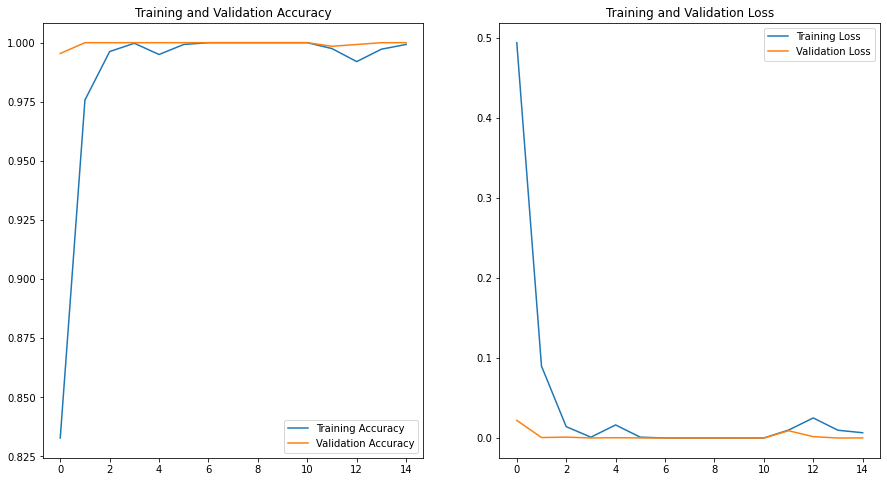

In [1]:

# import libraries
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras import optimizers
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os
from matplotlib import pyplot as plt

# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    
epochs=15

# create the train and validate directories
train_dir = 'student_data/train'
val_dir = 'student_data/test'

# get a list of the label names
label_ids = [item for item in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, item))]
print('Total Labels Found: ', len(label_ids))

# generate a dataset from image files in our directory from scale 1 to 255
# because we defined our images in pixels (just an array consisting of values from 1 to 255)
train_datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.3)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.3)

# create training generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # 48 x 48 pixel images
    batch_size=32,  # number of training examples uterlized in one iteration
    color_mode='rgb',  # for grayscale and white and black images
    class_mode='categorical')  # because we have catergories of faces (angry, sad, etc)

# create validation generator
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),  # 48 x 48 pixel images
    batch_size=32,  # number of training examples uterlized in one iteration
    color_mode='rgb',  # for grayscale and white and black images
    class_mode='categorical')  # because we have catergories of faces (angry, sad, etc)

# create our model for training
# initializing our sequential model
# Sequential api: allows you to create model layer by layer
# but does not allow sharing layers with multiple inputs and outputs
# Functional api: allows you to create models with alot of flexibility that you can easily
# connect layer to more than just the previous next layer (you can connect layers to literally any layer)
model = Sequential()

# model configurations
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_ids), activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizers.adam_v2.Adam(learning_rate=0.001, decay=1e-6),
              metrics=['accuracy'])

# train the model
model_info = model.fit(train_generator, steps_per_epoch=train_generator.samples // 32, epochs=epochs,
                       validation_data=validation_generator, validation_steps=validation_generator.samples // 32)


acc = model_info.history['accuracy']
val_acc = model_info.history['val_accuracy']

loss = model_info.history['loss']
val_loss = model_info.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Save trained model
model.save('CNN_model.h5')

Found 4000 files belonging to 4 classes.
1/1 [==============================] - 1s 873ms/step


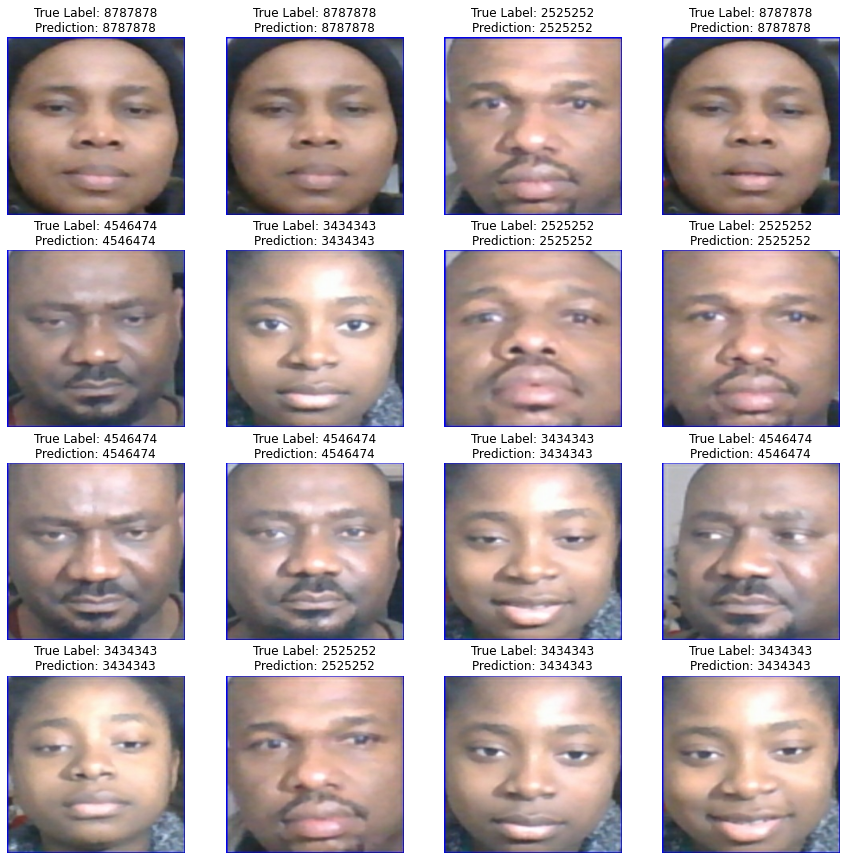

In [3]:
from tensorflow.keras.preprocessing import image_dataset_from_directory 
import numpy as np

predict_list = []
train_dataset = image_dataset_from_directory('student_data/train',
                                             shuffle=True,
                                             batch_size=32,image_size=(224,224))

class_name =  train_dataset.class_names

plt.figure(figsize = (15,15))
for image , label in train_dataset.take(1):  
    np.set_printoptions(suppress=True)
    # Create the array of the right shape to feed into the keras model
    # The 'length' or number of images you can put into the array is
    # determined by the first position in the shape tuple, in this case 1.
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    # turn the image into a numpy array
    image_array = np.asarray(image)
    # Normalize the image
    data = (image_array.astype(np.float32) / 127.0) - 1
    # run the inference
    prediction = model.predict(data)
    #print(prediction)
     
    for i in range(16) :      
        plt.subplot(4,4,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title('True Label: ' + class_name[label[i]] + '\n' + 'Prediction: ' + str(class_name[np.argmax(prediction[i])]))
        plt.axis("off")


In [4]:
import numpy as np
import pandas as pd
import os
from os import listdir
from PIL import Image
from numpy import array
from numpy import asarray
import seaborn as sns

#Load test data set
pathToTestData = 'student_data/test'
test_img_list = list()

shape_sum = 0
class_name_numb = dict()
train_avg_shape = 224

for dirname, _, filenames in os.walk(pathToTestData):
    for filename in filenames:
        img_data = Image.open(os.path.join(dirname, filename))

        resizedImage = img_data.resize((train_avg_shape, train_avg_shape))
        resizedImage = resizedImage.convert('RGB')
        resizedImage = asarray(resizedImage) / 255

        test_img_list.append([resizedImage, filename])

X_test = np.zeros((len(test_img_list), train_avg_shape, train_avg_shape, 3), dtype='float32')

for i, img in enumerate(test_img_list):
    X_test[i] = test_img_list[i][0]

    #Predict on test data
predictions = model.predict(X_test, batch_size=None, verbose=0, steps=None,
                               callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)
predictions = pd.DataFrame(predictions)

inverse_label_map = dict()
for k, v in train_generator.class_indices.items():
    inverse_label_map[v] = k

pred_label_num = predictions.idxmax(axis=1)
pred_label_num_new = list()

for x in pred_label_num:
    y = inverse_label_map[x]
    pred_label_num_new.append(y)

pred_label_num_new = pd.DataFrame(pred_label_num_new)
print(pred_label_num_new[0])

pred = pd.DataFrame()

testImages = pd.DataFrame(test_img_list)
pred.insert(0, 'file', testImages[1])
pred.insert(1, 'species', pred_label_num_new[0])
pred.head()

pred.to_csv('Predictions_CNN.csv', index=None, header=True)

0       2525252
1       2525252
2       2525252
3       2525252
4       2525252
         ...   
1327    8787878
1328    8787878
1329    8787878
1330    8787878
1331    8787878
Name: 0, Length: 1332, dtype: object


In [5]:
df = pd.read_csv('predictions_CNN.csv')
df

,file,species
0,7088f3b9-89f2-11ed-8858-c821584f7cb5.jpg,2525252
1,70c3f603-89f2-11ed-b2e5-c821584f7cb5.jpg,2525252
2,70f1339c-89f2-11ed-927b-c821584f7cb5.jpg,2525252
3,71264bca-89f2-11ed-9f53-c821584f7cb5.jpg,2525252
4,7153c7d8-89f2-11ed-af0d-c821584f7cb5.jpg,2525252
...,...,...
1327,c0120d81-89f0-11ed-ba68-c821584f7cb5.jpg,8787878
1328,c043283a-89f0-11ed-9f28-c821584f7cb5.jpg,8787878
1329,c0820217-89f0-11ed-b4fe-c821584f7cb5.jpg,8787878
1330,c0b8f211-89f0-11ed-9a50-c821584f7cb5.jpg,8787878


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                    